####LAM HONG KEVIN CHING 1009243043

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
from scipy.stats import levene

In [4]:
from statsmodels.stats.power import TTestIndPower

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/KeviiinCLH/INF2178/main/INF2178_A4_data.csv")

####Data Review and Cleaning

In [6]:
df.head()

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


In [7]:
df.shape

(294, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    int64  
 1   Subject ID  294 non-null    object 
 2   MRI ID      294 non-null    object 
 3   Group       294 non-null    object 
 4   Visit       294 non-null    int64  
 5   MR Delay    294 non-null    int64  
 6   M/F         294 non-null    object 
 7   Hand        294 non-null    object 
 8   Age         294 non-null    int64  
 9   EDUC        294 non-null    int64  
 10  SES         279 non-null    float64
 11  MMSE        293 non-null    float64
 12  CDR         294 non-null    float64
 13  eTIV        294 non-null    int64  
 14  nWBV        294 non-null    float64
 15  ASF         294 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 36.9+ KB


In [9]:
#Drop irrelevant columns
df.drop(df.columns[0],axis =1)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,OAS2_0184,OAS2_0184_MR2,Demented,2,553,F,R,73,16,3.0,21.0,1.0,1351,0.708,1.299
290,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030
291,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
292,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331


In [10]:
#Impute missing values in 'SES' and 'MMSE' columns with their median values
df['SES'].fillna(df['SES'].median(), inplace=True)
df['MMSE'].fillna(df['MMSE'].median(), inplace=True)

missing_values_summary = df.isnull().sum()
missing_values_summary


Unnamed: 0    0
Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

####EDA

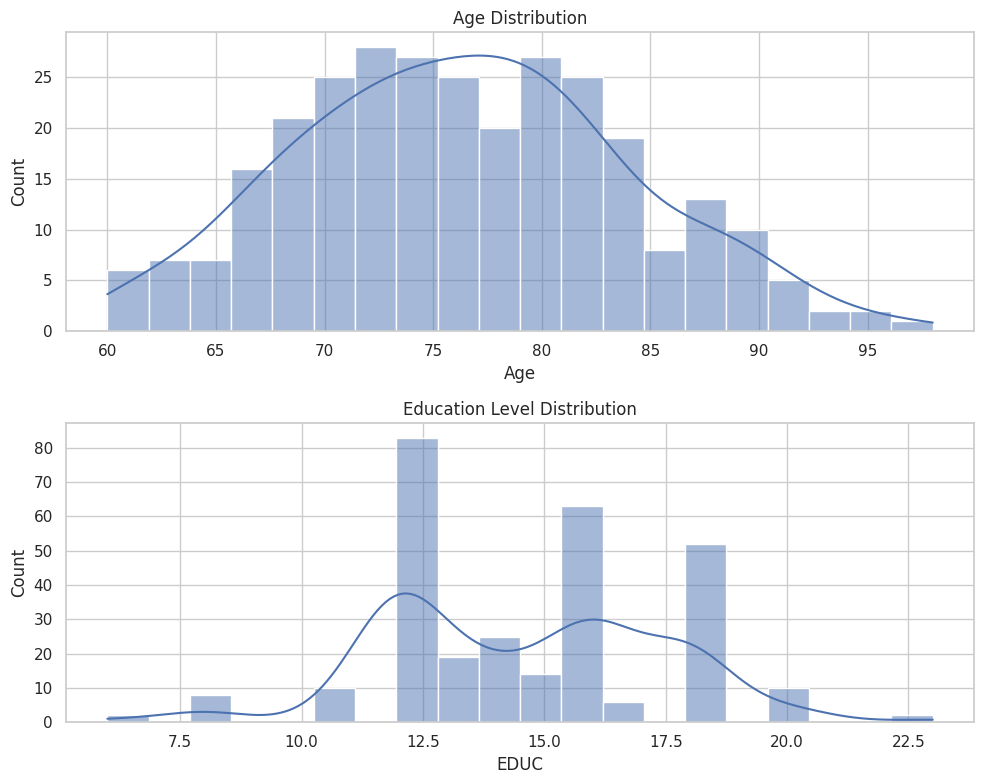

In [11]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(2,figsize=(10, 8))

#Plot distributions of age, education level, and mini mental state examination
sns.histplot(data=df, x="Age", kde=True, ax=ax[0], bins=20)
ax[0].set_title('Age Distribution')

sns.histplot(data=df, x="EDUC", kde=True, ax=ax[1], bins=20)
ax[1].set_title('Education Level Distribution')

plt.tight_layout()
plt.show()


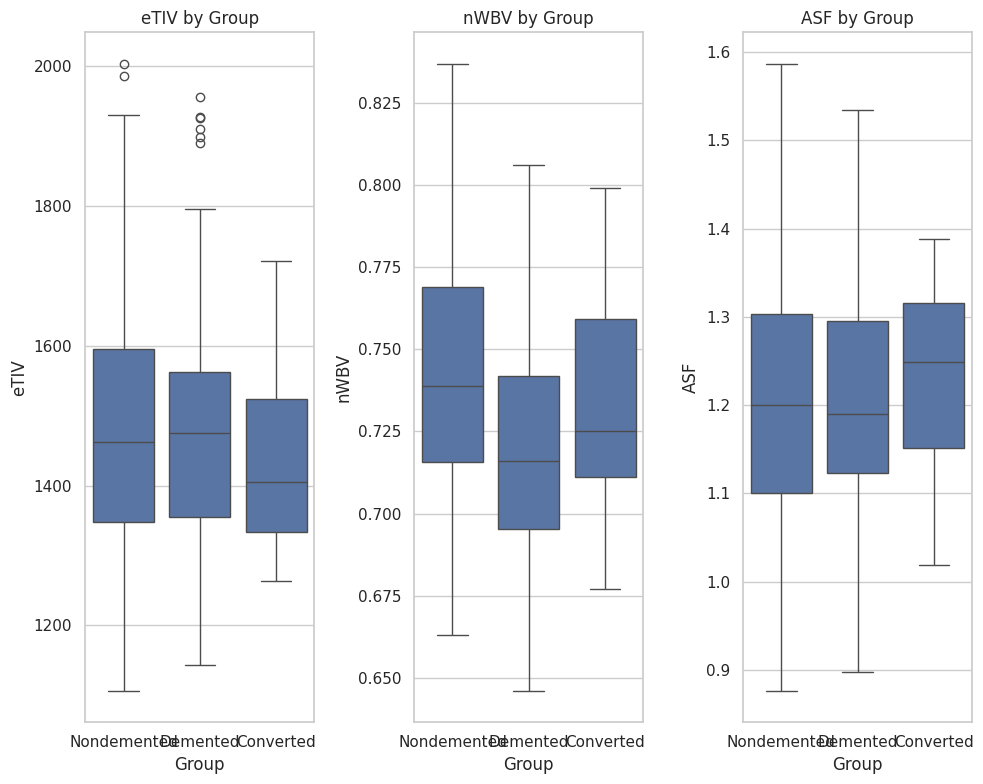

In [12]:
# Set up the matplotlib figure for multiple plots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 8))
# Box plots to compare MRI metrics between 'Demented' and 'Nondemented' groups
sns.boxplot(x='Group', y='eTIV', data=df, ax=axs[0])
axs[0].set_title('eTIV by Group')

sns.boxplot(x='Group', y='nWBV', data=df, ax=axs[1])
axs[1].set_title('nWBV by Group')

sns.boxplot(x='Group', y='ASF', data=df, ax=axs[2])
axs[2].set_title('ASF by Group')

plt.tight_layout()
plt.show()


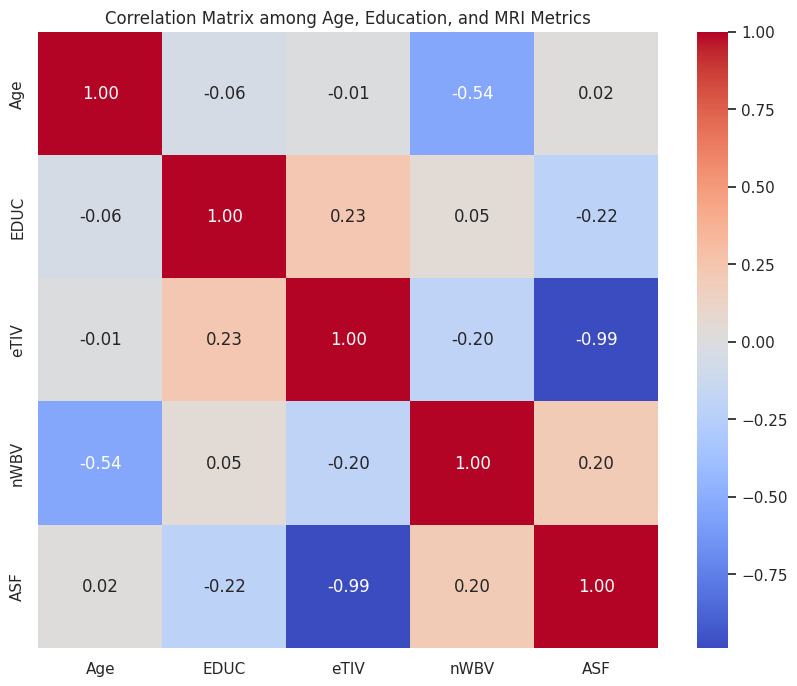

In [13]:
correlation_data = df[['Age', 'EDUC', 'eTIV', 'nWBV', 'ASF']]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix among Age, Education, and MRI Metrics')
plt.show()

####Mixed-effect ANOVA

**Research Question: How do MRI metric (nWBV) differ between demented and nondemented groups, controlling for age and education?**

In [14]:
model_formula_nWBV = 'nWBV ~ C(Group) + Age + EDUC'
#Fit the mixed-effects model for nWBV with a simplified random effects structure
model_nWMV_simplified = smf.mixedlm(model_formula_nWBV, df, groups=df['Subject ID']).fit()
model_nWMV_simplified.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
               Mixed Linear Model Regression Results
===================================================================
Model:                 MixedLM     Dependent Variable:     nWBV    
No. Observations:      294         Method:                 REML    
No. Groups:            150         Scale:                  0.0001  
Min. group size:       1           Log-Likelihood:         726.5873
Max. group size:       2           Converged:              Yes     
Mean group size:       2.0                                         
-------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                1.003    0.027  37.612 0.000  0.951  1.055
C(Group)[T.Demented]    -0.022    0.009  -2.555 0.011 -0.039 -0.005
C(Group)[T.Nondemented]  0.004    0.009   0.440 0.660 -0.013  0.021
Age                     -0.003    0.000 -12.076 0.000 -0.004 -0.003
EDUC                    -0.001    0.001  -1.133 0.257 -0.003  0.001
Group Var                0.001    0.017                            
===================================================================

"""

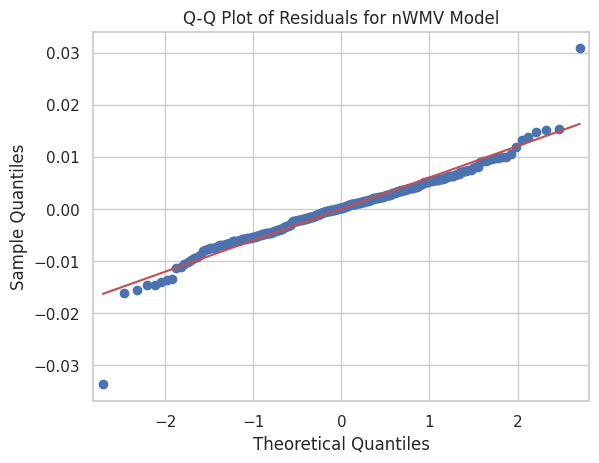

In [15]:
residuals = model_nWMV_simplified.resid
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals for nWMV Model')
plt.show()

In [16]:
# Group the residuals by the 'Group' variable
grouped_residuals = [residuals[df['Group'] == group] for group in df['Group'].unique()]

# Perform Levene's test for homogeneity of variances across groups
stat, p = levene(*grouped_residuals)

print(f'Levene’s test statistic: {stat}, p-value: {p}')

Levene’s test statistic: 5.455601360649471, p-value: 0.0047206541709055696


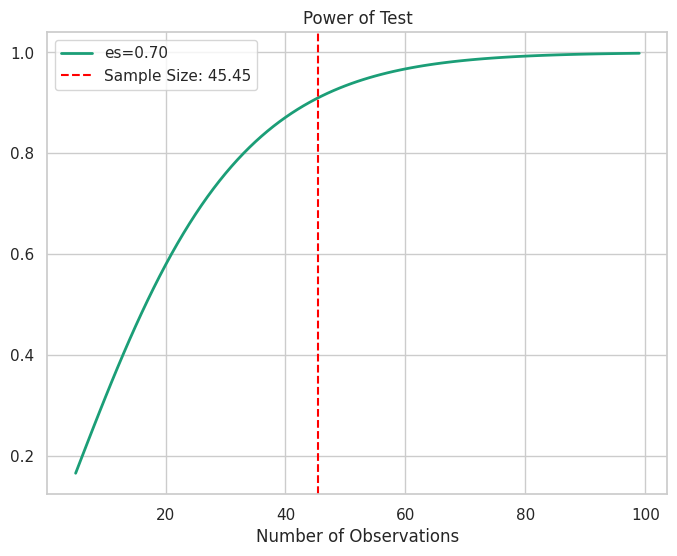

45.45073088568012

In [17]:
# Parameters for the power analysis
effect_size = 0.7
alpha = 0.05
power = 0.91

# Create a power analysis object
power_analysis = TTestIndPower()

# Calculate the sample size
sample_size = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1.0)

# Visualize the power analysis
fig, ax = plt.subplots(figsize=(8, 6))
power_analysis.plot_power(dep_var='nobs',
                          nobs=np.array(range(5, 100)),
                          effect_size=np.array([effect_size]),
                          alpha=alpha,
                          ax=ax)
plt.axvline(x=sample_size, linestyle='--', color='red', label=f'Sample Size: {sample_size:.2f}')
plt.legend()
plt.show()

sample_size
